Import modules/packages for leave one out cross validation (LOOCV).

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Make output directory

In [2]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

Load data and assign response (y) and predictor (X) variables. 

In [3]:
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = np.array(y)

data = [[0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
        [1.191072215,-0.150732988,1.02539397,0.192915327,0.237137539,0.533956707,-0.228751412,0.524620627,1.081934102,0.875224248,1.387946695,0.682203195,0.650375449,1.146245458,0.371088942,1.396910481,0.319208586,0.61971852,0.654233226,0.562634732,0.114221031,0.481049931,-0.428311114,1.255137404,1.041066024,0.969473169,-0.731967289,0.802590184,0.550082823,-1.272879776,0.427473371,-0.451440377,1.455265987,0.906650123,1.186416787,1.468974794,0.956555924,-0.05405806,1.015775188,1.052885522,0.483556833,0.589072028,-0.029023829,0.239449596,-1.288667521,-1.863513657,0.588107367,-1.285098534,-2.19697431,-1.946418018,-1.853475609,-0.654115876,0.725006684,-1.457779057,-1.53202234,-1.560086252,0.901247496,-1.95333853,0.419436844,0.594437252,-0.10963962,-1.435731885,-0.217053693,-2.446162331,-0.26829819,0.494217693,0.198844212,0.219697953,0.343805283,-1.236012131,-0.794290172,0.968658121,-0.624976831,0.401511012,-0.321885188,-1.102287759,-0.266741162,0.925130918,0.246887668,0.487255428,-1.108491516,-1.066809261,-1.564944354,-0.705496938,-1.287848124,-1.057692382,-0.803777606,1.394033023],
        [-0.44002816,0.453385329,-0.337472929,-0.033583724,-0.219898653,-0.325397414,-0.412351498,-0.222405691,-0.264917929,-0.473566865,-0.147048766,1.208750756,0.252537884,0.197443419,0.320922104,4.592645378,0.245814865,-0.172950436,-0.161118103,0.001480954,-0.101830174,0.274650893,-0.418262411,-0.469466638,-0.642136547,-0.618179328,-0.621553513,-0.395545951,-0.510329478,-0.326548107,-0.583672566,-0.497557776,-0.427312834,0.248306058,-0.211442006,-0.336956377,-0.234150626,1.347764539,-0.273027317,0.031135093,-0.161850483,-0.209572277,-0.139146033,-0.214289299,-0.438413788,0.338848487,-0.343843686,-0.476284728,-0.377939807,0.276234074,-0.397170164,-0.115285219,-0.421242469,-0.259574106,0.529786701,0.756101159,0.561018684,0.667630109,0.579009615,7.173925799,0.312744498,0.216081667,0.154165609,0.242134617,0.19444468,-0.029407106,-0.614365647,-0.548113186,-0.60293895,-0.584143251,-0.584488509,-0.354560687,-0.47677476,-0.418707243,-0.393530447,-0.424546769,-0.39813872,-0.313646308,-0.2443404,0.293015103,-0.14797429,-0.427312834,-0.174746444,-0.436277193,-0.384801763,-0.352330188,-0.047481766,-0.078027737],
        [0.923746207,-0.082287427,0.523443652,0.060317667,1.04642357,0.802319319,-0.114847693,0.508641802,1.040851959,1.373420459,1.78207929,0.907794285,1.614933246,2.047106175,1.157444286,1.882393386,0.033220242,1.302929884,0.6619809,0.786087486,-0.837358975,0.893562908,-0.872716075,1.383115443,0.959447872,1.403232571,-0.156731755,0.41867531,1.034805715,-1.196916663,0.560720581,0.012262618,0.98790302,0.664315272,0.746716544,1.101148578,1.313076681,0.743829194,0.736822276,1.383846408,0.85584025,1.019899659,0.999399935,0.05203137,-1.042926695,-0.466692066,-1.578958938,-1.303861851,-1.328841075,-1.162413446,-0.707170396,-0.590467017,-0.756817442,-1.012959415,-0.94046306,-0.561275579,-0.473641177,-1.170956912,0.673431416,-0.743711036,-1.156919951,-0.95956779,-0.665380653,-1.419599002,0.043697913,-0.957183978,-1.574659024,-0.979938969,-0.167013944,-0.487611658,-0.379098737,0.539772085,-1.311070336,0.379191034,-0.971346898,-1.467300814,-0.784254868,1.83216674,-0.297419302,-0.799910905,-0.779723799,-0.743130675,-1.188155581,-1.044271488,-1.050747487,-1.144094217,-0.27517089,-1.488459549],
        [-0.798996719,-0.399473614,-0.943752279,-0.641224329,0.147040419,-0.968988286,-0.150889615,0.177498503,-0.410960801,-0.599658531,0.251669968,0.699312906,0.673233625,1.164793851,2.438700701,2.268155477,0.478094526,0.851879808,0.152597041,0.183385522,0.014904936,1.429097995,-1.328671541,0.175772556,-0.235514911,-0.449527446,-0.67814037,-0.328975228,-0.4034764,-0.71071355,-0.978524884,0.230877737,0.324797017,0.33470825,-0.048171257,0.291215364,0.457393536,-0.383665685,-0.661520272,0.689352597,0.939547802,-0.365795883,0.246228086,-0.770118046,-1.13424646,-0.27506722,-1.061307419,-1.095930031,-0.808802888,0.172315825,-0.795729379,0.585155054,0.357048095,-1.309702026,1.306306262,1.849306884,0.981363126,1.339220209,2.369156183,5.253538448,0.360709424,-0.166599392,0.107261394,1.274455394,0.834901664,-0.103030368,-0.594225636,-0.580120153,-0.573537778,-1.005300211,-0.370212011,-0.989165341,-0.878550622,-0.344340093,-0.508931942,-1.124246753,-0.602871958,0.173933943,-0.182953375,-0.11632852,-0.939766082,-0.639831545,-0.442345103,-0.637182144,-0.730783468,-0.51855425,0.101138673,-0.899646983]]

X = np.array(data)

labels = np.array(["ZBED2", "SF3B5", "SFT2D3", "SYTL1", "TNFRSF10A"])

In [4]:
fprdict = dict()
tprdict = dict()
roc_aucdict = dict()
df2save = pd.DataFrame()

for i in range(len(X)):
    Xsub = X[i]
    Xsub = Xsub.reshape(-1, 1)
    model = LogisticRegression().fit(Xsub, y)
    fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(Xsub)[:,1])
    roc_auc = metrics.roc_auc_score(y, model.predict_proba(Xsub)[:,1])
    fprdict[labels[i]] = fpr
    tprdict[labels[i]] = tpr
    roc_aucdict[labels[i]] = roc_auc
    
    print('Row', (i+1))
    print("Accuracy:", metrics.accuracy_score(y, model.predict(Xsub)))
    print("AUC:", roc_auc)
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y, model.predict(Xsub)))
    print("Classification report:")
    print(metrics.classification_report(y, model.predict(Xsub)))
    print()
    
df2save = (pd.Series(fprdict).to_frame('fpr').join(pd.Series(tprdict).to_frame('tpr').join(pd.Series(roc_aucdict).to_frame('AUC'), how='outer')))
df2save.to_csv('output\ROCdata.txt', sep='\t', header=True, index=True)

Row 1
Accuracy: 0.5113636363636364
AUC: 0.5113636363636364
Confusion matrix:
[[44  0]
 [43  1]]
Classification report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        44
           1       1.00      0.02      0.04        44

    accuracy                           0.51        88
   macro avg       0.75      0.51      0.36        88
weighted avg       0.75      0.51      0.36        88


Row 2
Accuracy: 0.7386363636363636
AUC: 0.8243801652892563
Confusion matrix:
[[36  8]
 [15 29]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        44
           1       0.78      0.66      0.72        44

    accuracy                           0.74        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.74      0.74      0.74        88


Row 3
Accuracy: 0.5227272727272727
AUC: 0.49767561983471076
Confusion matrix:
[[32 12]
 [30 14]]
Classific

Time to visualize the results generated above

<Figure size 432x288 with 0 Axes>

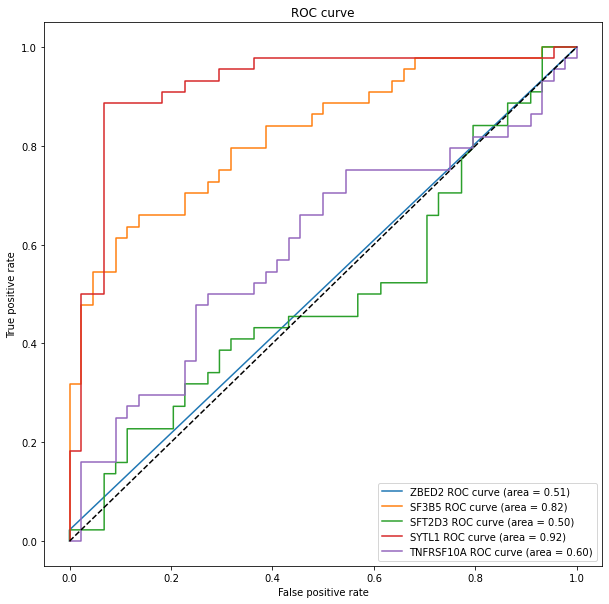

In [5]:
plt.figure()
plt.figure(figsize=(10, 10))
for iter in fprdict:
    fprprint = fprdict[iter]
    tprprint = tprdict[iter]
    roc_aucprint = roc_aucdict[iter]
    plt.plot(fprprint, tprprint, label = (str(iter) + " ROC curve (area = %0.2f)" % roc_aucprint))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='best')
plt.savefig('output\multipleROCs.png', dpi=100)
plt.show()